In [1]:
import numpy as np
import pandas as pd
import re,math
from sklearn import preprocessing
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
#from bokeh.plotting import figure, show, output_file


#已有的35细胞系
data = pd.read_csv(r'35_CCLE4000.csv')

In [2]:
data.head()

,Name,MT.CO2,MT.CO1,MT.RNR2,FTL,EEF1A1P5,RPS18,TMSB10,FN1,MT.ND2,...,G3BP1,FAS,MIA,TNFRSF1B,PIK3CD,RAVER1,NEUROD6,IGHV2.26,RP11.254B13.1,MYRF
0,A2058,138.664175,99.733470,29.362917,33.507670,28.580983,32.005938,10.723401,4.332792,46.013772,...,0.622143,-0.016467,0.225654,-0.087723,0.010787,0.076835,-0.093931,-0.092728,0.178902,0.060812
1,A2780,132.079201,114.522279,43.443616,7.071069,41.351143,20.272538,3.218207,-0.070932,47.875397,...,0.383265,-0.039013,-0.078075,-0.077774,-0.044276,0.350657,-0.078075,-0.078075,0.128915,-0.067700
2,A375,88.664555,82.985653,17.684115,15.773244,54.772199,30.988268,19.931180,0.679905,34.807456,...,0.712732,-0.026034,1.234437,-0.080171,-0.032848,0.775303,-0.118437,-0.118437,0.332271,-0.083249
3,A427,129.025616,89.746054,13.120489,11.230936,23.942771,11.706606,29.606541,-0.044986,88.208783,...,0.173741,0.025657,-0.061178,-0.061313,-0.031394,0.105856,-0.061409,-0.061201,0.096060,-0.026113
4,CAOV3,122.213951,116.564153,43.291175,26.778444,35.949574,17.530583,22.951898,1.567967,53.569745,...,0.493755,0.062419,-0.074416,-0.059800,-0.042722,0.163952,-0.077403,-0.076815,0.117359,-0.055078


In [3]:
name_index = [] 
for i in data['Name']:
    name_index.append(str(i).strip())
#已有35细胞系名称
#name_index

In [4]:
#原始数据
origin = pd.read_csv(r'CCLE_EXP(name).csv')
origin

,Name,22RV1_PROSTATE,2313287_STOMACH,253JBV_URINARY_TRACT,253J_URINARY_TRACT,42MGBA_CENTRAL_NERVOUS_SYSTEM,5637_URINARY_TRACT,59M_OVARY,639V_URINARY_TRACT,647V_URINARY_TRACT,...,UMUC16_URINARY_TRACT,UMUC4_URINARY_TRACT,UMUC5_URINARY_TRACT,UMUC6_URINARY_TRACT,UMUC7_URINARY_TRACT,UMUC9_URINARY_TRACT,UPCISCC152_UPPER_AERODIGESTIVE_TRACT,UW228_CENTRAL_NERVOUS_SYSTEM,Y79_AUTONOMIC_GANGLIA,YAMATO_SOFT_TISSUE
0,DDX11L1,0.00000,0.03755,0.00000,0.06507,0.00000,0.01378,0.01463,0.03085,0.00000,...,0.00000,0.02977,0.02999,0.03532,0.03831,0.03236,0.00000,0.03799,0.02907,0.00000
1,WASH7P,12.63011,10.14155,6.20657,6.55835,7.61752,6.19356,4.62277,6.00767,4.70699,...,6.42321,8.17443,7.75149,9.97036,8.17080,8.70551,15.23348,6.47732,8.45568,11.81688
2,MIR1302-11,0.04289,0.01037,0.16955,0.23364,0.08765,0.00000,0.00808,0.09373,0.02568,...,0.12367,0.19183,0.10492,0.18537,0.07408,0.07747,0.07448,0.01049,0.39607,0.17586
3,FAM138A,0.00000,0.00869,0.22423,0.16558,0.00000,0.00637,0.00000,0.01427,0.00000,...,0.01554,0.00459,0.01850,0.04903,0.01330,0.00000,0.02674,0.00879,0.26449,0.02266
4,OR4G4P,0.00000,0.00000,0.02886,0.03875,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00667,0.01182,0.01786,0.01052,0.01141,0.00642,0.00000,0.00000,0.00000,0.01459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56313,MT-ND5,2393.80298,1960.96802,1896.28870,3522.37695,1178.93579,1345.42151,1943.89148,1413.57471,956.31226,...,1994.84985,704.86267,3936.23853,3560.20459,1245.38379,1452.41895,793.58710,757.41357,1218.16992,1320.84558
56314,MT-ND6,1825.52332,2056.64697,2184.88647,4568.00195,1616.96484,1189.86279,1906.90405,1469.75574,1151.82861,...,1260.28455,398.13406,2419.38281,1791.45386,823.17352,996.53717,593.61139,472.01627,729.65912,564.16779
56315,MT-TE,0.25386,0.00000,0.26410,0.00000,0.12970,0.00000,0.00000,0.25217,0.00000,...,1.28093,0.40550,1.22567,1.58799,1.40931,0.08817,0.31489,0.15526,0.55439,0.00000
56316,MT-CYB,4923.78223,3827.00537,1905.18481,4590.01416,2343.92407,1902.01685,2026.15710,1603.98230,2752.73779,...,1585.35229,2027.31738,8521.06738,10211.49121,1641.64551,3437.12769,1645.22168,973.56439,1221.39954,1755.82764


In [5]:
c_list = []
for i in origin.columns:
    c_list.append(str(i))
#原始数据细胞系名称合集
#c_list

In [6]:
#name = re.findall()
real_names = []
for i in name_index:
    text = i + '.*? '
    cout = 0
    for j in c_list:
        temp_list = re.findall(text, j, re.S)
        if len(temp_list) != 0:
            if (c_list[cout] != 'NCIH2342_LUNG ') & (c_list[cout] != 'NCIH2347_LUNG '):
                real_names.append(c_list[cout])
                break
        cout +=1
#补全后的35细胞系名称
#real_names

In [7]:
temp = []
for i in real_names:
    temp.append(origin[i])
len(temp)

35

In [8]:
temp[0]

0           0.01430
1           8.13296
2           0.10272
3           0.05295
4           0.00000
            ...    
56313    1451.63843
56314    1370.87061
56315       0.00000
56316    3178.30786
56317       0.00000
Name: A2058_SKIN , Length: 56318, dtype: float64

In [9]:
type(temp[0])

pandas.core.series.Series

In [10]:
df = pd.DataFrame(temp)
df = df.transpose()#转置
#合并35细胞系数据
#df

In [11]:
df.index = origin['Name']
#替换行索引为基因名称
#df

In [12]:
#保存筛选结果1
#df.to_csv('Screened_First.csv')

In [13]:
#复制数据，避免误操作
temp_z_score = df.copy()

In [14]:
#zscore标准化
values = temp_z_score.values            #Dataframe转换为Array
values = values.astype('float32')       #定义数据类型
scaler = preprocessing.StandardScaler() #创建Scaler对象
temp = scaler.fit_transform(values)     #稀疏矩阵  
z_score=pd.DataFrame(temp,columns=temp_z_score.columns,index = origin['Name']) #将Array还原为Dataframe，保持行列名

In [15]:
#z_score

In [16]:
#分割每行并计算各行方差(每个基因的方差)
temp = []
for i in origin['Name']:
    te = z_score.loc[i].values.var()
    temp.append(te)
#temp

In [17]:
#方差Dataframe
temp1 = pd.DataFrame(temp,index = origin['Name'],columns=['variance'])
#temp1

In [18]:
#按照方差排序
temp2 = temp1.sort_values(by="variance",ascending=False)  # by指定按哪列排序。ascending表示是否升序
#temp2

In [19]:
#取【0:指定位置】区间内基因构成dataframe，选取基因
temp_index = temp2[0:1000].index #修改这里取区间
draft_first = z_score.loc[temp_index[0]]
t = draft_first
for i in temp_index:
    temp_data = z_score.loc[i]
    t = t[~t.index.duplicated(keep='first')]
    temp_data = temp_data[~temp_data.index.duplicated(keep='first')]
    t = pd.concat([t,temp_data],axis=1)
t.dropna(subset=['MT-CO2'],inplace=True)

In [20]:
#固定区间的标准化后的  基因表达-细胞系   dataframe
df2 = t.transpose().copy()
#df2 = df2.drop_duplicates()
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2 = df2.drop_duplicates()
df2

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
MT-CO2,138.665405,132.080368,88.665337,129.026764,122.215034,130.080261,147.931213,150.274948,88.670563,121.103760,...,178.673752,103.776741,138.319656,132.701187,159.497208,139.794464,134.107101,106.909088,116.005997,74.758606
FTL,33.507969,7.071132,15.773384,11.231035,26.778683,4.013042,3.810183,8.348491,19.012959,12.412223,...,34.435070,34.991974,6.396748,20.167116,0.791694,21.789629,3.167242,4.184994,19.852560,30.605114
MT-ND2,46.014179,47.875824,34.807766,88.209564,53.570221,55.080532,39.533794,28.851393,78.043709,30.601273,...,25.188253,52.729561,37.203083,53.635742,54.151505,71.736412,47.124008,30.010900,29.537886,20.045937
MT-RNR2,29.363178,43.444000,17.684273,13.120605,43.291561,53.964428,57.979183,57.678417,79.852448,22.386780,...,57.014282,33.238365,59.669582,55.456463,15.444898,21.513290,28.767656,55.377277,14.408346,59.660408
EEF1A1P5,28.581238,41.351509,54.772686,23.942984,35.949894,30.014765,9.664021,37.236958,44.284985,29.743744,...,33.773712,52.704514,47.066711,24.994398,16.572939,18.826252,51.085117,35.221874,19.798355,21.329021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XXbac-BPG248L24.12,0.061845,0.142304,-0.107523,-0.051331,0.016112,-0.064636,0.209108,-0.018661,-0.068647,-0.026844,...,0.648530,0.180575,-0.039227,-0.061717,0.600491,-0.029911,-0.074537,-0.099337,0.294309,0.204428
ALCAM,0.025598,0.164097,0.003666,0.056485,0.227979,-0.014672,0.013955,0.330006,0.352970,0.262150,...,0.604389,2.474550,-0.076882,-0.003625,0.119447,0.034410,0.001512,0.545750,0.165522,-0.071461
RNASE1,-0.093323,-0.075943,-0.117280,-0.057611,0.102986,-0.070835,-0.017469,-0.063178,-0.080873,-0.047381,...,-0.052249,-0.102556,-0.082228,-0.019514,-0.059600,0.185144,-0.075314,-0.099447,-0.092092,-0.115359
MRPL3,0.995097,0.789534,1.686972,0.849042,0.760060,1.116139,0.363657,0.729918,2.085207,1.260649,...,0.385773,0.944106,0.903428,1.153754,0.436484,1.810233,0.870034,1.249662,1.235744,1.823148


In [21]:
#保存筛选结果2
#各基因按照方差排序从大到小排序的标准化后的数据
#df2.to_csv('Screened_Second.csv')

#计算谷本系数的函数
def tanimoto_coefficient(p_vec, q_vec):
    pq = np.dot(p_vec, q_vec)
    p_square = np.linalg.norm(p_vec)*np.linalg.norm(p_vec)
    q_square = np.linalg.norm(q_vec)*np.linalg.norm(q_vec)
    return pq / (p_square + q_square - pq)

#计算谷本系数
temp4 = []
for i in df2.columns:
    tmp = []
    a = np.array(df2[i])
    for j in df2.columns:
        b = np.array(df2[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp4.append(tmp)
Tanimoto = pd.DataFrame(temp4,columns=df2.columns,index = df2.columns)
#Tanimoto.to_csv('Tanimoto.csv')
#Tanimoto

#计算斯皮尔曼相关性系数
spearman=df2.corr('spearman')
#spearman.to_csv('spearman.csv')
#输出斯皮尔曼相关性系数矩阵
#spearman

#计算皮尔森相关系数 temp4
temp4 = []
for i in df2.columns:
    tmp = []
    a = np.array(df2[i])
    for j in df2.columns:
        b = np.array(df2[j])
        tpper = np.corrcoef(a,b)
        tmp.append(tpper[0][1])
    temp4.append(tmp)
#temp4
#构建皮尔逊相关性系数矩阵 Pearson
Pearson = pd.DataFrame(temp4,columns=df2.columns,index = df2.columns) #将Array还原为Dataframe，保持行列名
Pearson

In [22]:
#计算斯皮尔曼相关性系数
Pearson=df2.corr('pearson')
#spearman.to_csv('spearman.csv')
#输出斯皮尔曼相关性系数矩阵
#spearman

In [23]:
#保存筛选结果3
#Pearson.to_csv('Pearson.csv')

In [24]:
# 筛数据
tptp = Pearson.copy()
dpdp = Pearson.copy()
gl = 0.88
# 筛高相似
while True:
    drop_status = 0
    count = 0
    drop_h = 0
    drop_l = 0
    for i in tptp.values:
        cot = 0
        for j in i:
            if j < gl:
                drop_h = count
                drop_l = cot
                #tptp.drop(index=[tptp.columns[cot]],columns=[tptp.columns[cot]],inplace=True)
                drop_status = 1
                break
            cot += 1
        if drop_status == 1:
            break
        count += 1
    
    #取出对应行
    count = 0 
    for i in tptp.values:
        if count == drop_h:
            drop_h_list = i
            break
        count += 1
    
    #取出对应列
    drop_l_list = []
    for i in tptp.values:
        cot = 0
        for j in i:
            if cot == drop_l:
                drop_l_list.append(j)
            cot += 1
    
    h=np.array(drop_h_list).copy()
    l=np.array(drop_l_list).copy()
    h[h < gl]=10000
    l[l < gl]=10000
    if  np.sum(h) >= np.sum(l):
        tptp.drop(index=[tptp.columns[drop_h]],columns=[tptp.columns[drop_h]],inplace=True)
    elif np.sum(h) < np.sum(l):
        tptp.drop(index=[tptp.columns[drop_l]],columns=[tptp.columns[drop_l]],inplace=True)

    p = np.array(tptp.values).copy()
    p[p < gl]=35*35
    if  np.sum(p) < 35*35:
        break

In [25]:
tptp

,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,MDAMB436_BREAST,NCIH1650_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
A2058_SKIN,1.000000,0.930303,0.927124,0.909637,0.909275,0.897113,0.932320,0.919262,0.946546,0.908132,0.936307,0.919746,0.898601
A2780_OVARY,0.930303,1.000000,0.928270,0.963817,0.900769,0.899627,0.909715,0.898621,0.918091,0.915631,0.915444,0.927747,0.924535
CAOV3_OVARY,0.927124,0.928270,1.000000,0.910762,0.900243,0.882098,0.940167,0.940764,0.922539,0.894332,0.921032,0.914830,0.926968
COLO320_LARGE_INTESTINE,0.909637,0.963817,0.910762,1.000000,0.900653,0.904101,0.893072,0.885956,0.915602,0.896100,0.906216,0.932565,0.934886
HT29_LARGE_INTESTINE,0.909275,0.900769,0.900243,0.900653,1.000000,0.941999,0.908661,0.916919,0.925330,0.912669,0.894559,0.958214,0.923333
KPL1_BREAST,0.897113,0.899627,0.882098,0.904101,0.941999,1.000000,0.886256,0.932011,0.901476,0.936112,0.889660,0.934882,0.924609
MDAMB436_BREAST,0.932320,0.909715,0.940167,0.893072,0.908661,0.886256,1.000000,0.925982,0.950508,0.906104,0.897728,0.905164,0.913393
NCIH1650_LUNG,0.919262,0.898621,0.940764,0.885956,0.916919,0.932011,0.925982,1.000000,0.913215,0.932619,0.915380,0.910002,0.934409
NCIH460_LUNG,0.946546,0.918091,0.922539,0.915602,0.925330,0.901476,0.950508,0.913215,1.000000,0.910285,0.907100,0.928346,0.927300
OVCAR4_OVARY,0.908132,0.915631,0.894332,0.896100,0.912669,0.936112,0.906104,0.932619,0.910285,1.000000,0.891593,0.894694,0.908545


In [26]:
# 筛低相似 
while True:
    dpdp[dpdp == 1]=-1
    drop_status = 0
    count = 0
    drop_h = 0
    drop_l = 0
    for i in dpdp.values:
        cot = 0
        for j in i:
            if j > gl:
                drop_h = count
                drop_l = cot
                drop_status = 1
                break
            cot += 1
        if drop_status == 1:
            break
        count += 1
    
    #取出对应行
    count = 0
    drop_h_list = []
    for i in dpdp.values:
        if count == drop_h:
            drop_h_list = i
            break
        count += 1
    
    #取出对应列
    drop_l_list = []
    for i in dpdp.values:
        cot = 0
        for j in i:
            if cot == drop_l:
                drop_l_list.append(j)
            cot += 1
    
    h=np.array(drop_h_list).copy()
    l=np.array(drop_l_list).copy()
    h[h > gl]=10000
    l[l > gl]=10000
    if  np.sum(h) >= np.sum(l):
        dpdp.drop(index=[dpdp.columns[drop_h]],columns=[dpdp.columns[drop_h]],inplace=True)
    elif np.sum(h) < np.sum(l):
        dpdp.drop(index=[dpdp.columns[drop_l]],columns=[dpdp.columns[drop_l]],inplace=True)
    p = np.array(dpdp.values).copy()
    p[p > gl]=35*35
    if  np.sum(p) < 35*35:
        break
dpdp[dpdp == -1]=1

In [27]:
dpdp

,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,KPL1_BREAST,MSTO211H_PLEURA,NCIH2122_LUNG,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
A375_SKIN,1.000000,0.752383,0.663802,0.782167,0.821025,0.781921,0.878218,0.767848,0.834982,0.670203,0.853058,0.820907,0.789252,0.853464,0.788270,0.790343
A427_LUNG,0.752383,1.000000,0.812862,0.774588,0.818296,0.828696,0.801392,0.811261,0.741716,0.770260,0.690188,0.821334,0.801864,0.751837,0.741748,0.643226
EFM192A_BREAST,0.663802,0.812862,1.000000,0.792164,0.760372,0.856743,0.735940,0.840500,0.694497,0.697478,0.601123,0.767560,0.712511,0.751552,0.685443,0.635109
ES2_OVARY,0.782167,0.774588,0.792164,1.000000,0.799282,0.861235,0.837128,0.850296,0.769842,0.689476,0.703216,0.842409,0.761859,0.804464,0.755758,0.731270
HCT116_LARGE_INTESTINE,0.821025,0.818296,0.760372,0.799282,1.000000,0.787637,0.847499,0.831041,0.828397,0.723023,0.736493,0.764536,0.820568,0.812914,0.757259,0.788102
KPL1_BREAST,0.781921,0.828696,0.856743,0.861235,0.787637,1.000000,0.832732,0.871797,0.771628,0.744227,0.720613,0.851102,0.768648,0.871681,0.798347,0.697702
MSTO211H_PLEURA,0.878218,0.801392,0.735940,0.837128,0.847499,0.832732,1.000000,0.863809,0.848469,0.810657,0.822915,0.869727,0.845365,0.820224,0.812507,0.783873
NCIH2122_LUNG,0.767848,0.811261,0.840500,0.850296,0.831041,0.871797,0.863809,1.000000,0.782475,0.868825,0.737227,0.859478,0.815009,0.833030,0.747463,0.748694
NCIH520_LUNG,0.834982,0.741716,0.694497,0.769842,0.828397,0.771628,0.848469,0.782475,1.000000,0.655516,0.775613,0.747273,0.772279,0.821227,0.693501,0.728194
OV90_OVARY,0.670203,0.770260,0.697478,0.689476,0.723023,0.744227,0.810657,0.868825,0.655516,1.000000,0.708037,0.791699,0.767250,0.693530,0.696472,0.669184


In [28]:
tptp.to_csv(r'tptp.csv')
dpdp.to_csv(r'dpdp.csv')
high_similar_regiments = pd.read_csv(r'tptp.csv')
low_similar_regiments = pd.read_csv(r'dpdp.csv')

In [29]:
#读取药物对数据  高相似 低相似团
drugs_data = pd.read_excel(r'Label_synergy4000.xlsx')
#相似团手动挑的
#皮尔逊处理后挑选的相似团
#high_similar_regiments = pd.read_csv(r'高相似性细胞团.csv')
#low_similar_regiments = pd.read_csv(r'低相似性细胞团.csv')
#斯皮尔曼处理后挑选的相似团
#high_similar_regiments = pd.read_csv(r'S高相似性细胞团.csv')
#low_similar_regiments = pd.read_csv(r'S低相似性细胞团.csv')
#谷本处理后挑选的相似团
#high_similar_regiments = pd.read_csv(r'G高相似性细胞团.csv')
#low_similar_regiments = pd.read_csv(r'G低相似性细胞团.csv')

In [30]:
drugs_data

,DrugA,DrugB,A2058,A2780,A375,A427,CAOV3,COLO320,EFM192A,ES2,...,SKMES1,SKOV3,SW620,SW837,T47D,UACC62,VCAP,ZR751,DLD1,PA1
0,MK-5108,SORAFENIB,-9.51,2.60,15.20,6.22,-16.4000,5.360,-7.080,8.050,...,-6.230,13.50,5.10,5.15,6.63,3.880,-1.48,-8.660,13.00,4.83
1,VINORELBINE,SUNITINIB,-13.20,-4.03,11.10,10.50,-15.6000,16.300,-1.720,8.890,...,2.820,1.51,13.80,-5.77,-14.40,-10.700,-16.80,-11.800,15.30,-13.10
2,SUNITINIB,MK-8776,26.40,14.50,29.50,17.50,17.7000,10.300,0.830,5.770,...,-12.200,-7.40,10.50,-4.97,13.10,18.800,12.00,5.950,6.77,18.90
3,5-FU,DINACICLIB,4.33,-8.16,-5.42,-7.75,-14.3000,4.810,0.312,3.410,...,-3.140,-13.90,-4.57,-19.60,-2.72,3.680,14.40,-13.600,-3.64,-5.73
4,SUNITINIB,MK-2206,45.50,22.50,22.80,18.00,20.1000,22.700,6.300,24.900,...,24.400,31.20,18.40,12.90,14.30,34.700,21.20,14.400,26.40,55.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,CARBOPLATIN,MK-2206,1.35,11.70,20.20,9.17,46.6000,0.586,-37.700,-2.100,...,-0.217,-10.90,22.00,-2.43,-43.90,9.340,-4.83,-15.400,-4.42,17.80
579,5-FU,LAPATINIB,9.19,8.01,7.50,-4.18,-6.7800,3.210,7.240,5.340,...,11.100,7.12,-2.42,6.96,14.90,9.120,10.60,14.700,11.60,14.20
580,ETOPOSIDE,AZD1775,15.40,12.40,19.20,-5.01,37.4000,8.590,9.770,3.770,...,4.330,5.84,-1.58,18.60,-20.70,25.100,20.30,3.750,-4.29,-1.44
581,BORTEZOMIB,MK-8669,-6.30,4.79,-23.30,-2.70,0.0856,-17.300,19.200,17.400,...,-13.900,-2.42,-2.61,19.10,-11.10,-13.500,9.05,-0.306,9.48,-4.29


In [31]:
high_similar_regiments

,Unnamed: 0,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,MDAMB436_BREAST,NCIH1650_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
0,A2058_SKIN,1.000000,0.930303,0.927124,0.909637,0.909275,0.897113,0.932320,0.919262,0.946546,0.908132,0.936307,0.919746,0.898601
1,A2780_OVARY,0.930303,1.000000,0.928270,0.963817,0.900769,0.899627,0.909715,0.898621,0.918091,0.915631,0.915444,0.927747,0.924535
2,CAOV3_OVARY,0.927124,0.928270,1.000000,0.910762,0.900243,0.882098,0.940167,0.940764,0.922539,0.894332,0.921032,0.914830,0.926968
3,COLO320_LARGE_INTESTINE,0.909637,0.963817,0.910762,1.000000,0.900653,0.904101,0.893072,0.885956,0.915602,0.896100,0.906216,0.932565,0.934886
4,HT29_LARGE_INTESTINE,0.909275,0.900769,0.900243,0.900653,1.000000,0.941999,0.908661,0.916919,0.925330,0.912669,0.894559,0.958214,0.923333
5,KPL1_BREAST,0.897113,0.899627,0.882098,0.904101,0.941999,1.000000,0.886256,0.932011,0.901476,0.936112,0.889660,0.934882,0.924609
6,MDAMB436_BREAST,0.932320,0.909715,0.940167,0.893072,0.908661,0.886256,1.000000,0.925982,0.950508,0.906104,0.897728,0.905164,0.913393
7,NCIH1650_LUNG,0.919262,0.898621,0.940764,0.885956,0.916919,0.932011,0.925982,1.000000,0.913215,0.932619,0.915380,0.910002,0.934409
8,NCIH460_LUNG,0.946546,0.918091,0.922539,0.915602,0.925330,0.901476,0.950508,0.913215,1.000000,0.910285,0.907100,0.928346,0.927300
9,OVCAR4_OVARY,0.908132,0.915631,0.894332,0.896100,0.912669,0.936112,0.906104,0.932619,0.910285,1.000000,0.891593,0.894694,0.908545


In [32]:
low_similar_regiments

,Unnamed: 0,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,KPL1_BREAST,MSTO211H_PLEURA,NCIH2122_LUNG,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,A375_SKIN,1.000000,0.752383,0.663802,0.782167,0.821025,0.781921,0.878218,0.767848,0.834982,0.670203,0.853058,0.820907,0.789252,0.853464,0.788270,0.790343
1,A427_LUNG,0.752383,1.000000,0.812862,0.774588,0.818296,0.828696,0.801392,0.811261,0.741716,0.770260,0.690188,0.821334,0.801864,0.751837,0.741748,0.643226
2,EFM192A_BREAST,0.663802,0.812862,1.000000,0.792164,0.760372,0.856743,0.735940,0.840500,0.694497,0.697478,0.601123,0.767560,0.712511,0.751552,0.685443,0.635109
3,ES2_OVARY,0.782167,0.774588,0.792164,1.000000,0.799282,0.861235,0.837128,0.850296,0.769842,0.689476,0.703216,0.842409,0.761859,0.804464,0.755758,0.731270
4,HCT116_LARGE_INTESTINE,0.821025,0.818296,0.760372,0.799282,1.000000,0.787637,0.847499,0.831041,0.828397,0.723023,0.736493,0.764536,0.820568,0.812914,0.757259,0.788102
5,KPL1_BREAST,0.781921,0.828696,0.856743,0.861235,0.787637,1.000000,0.832732,0.871797,0.771628,0.744227,0.720613,0.851102,0.768648,0.871681,0.798347,0.697702
6,MSTO211H_PLEURA,0.878218,0.801392,0.735940,0.837128,0.847499,0.832732,1.000000,0.863809,0.848469,0.810657,0.822915,0.869727,0.845365,0.820224,0.812507,0.783873
7,NCIH2122_LUNG,0.767848,0.811261,0.840500,0.850296,0.831041,0.871797,0.863809,1.000000,0.782475,0.868825,0.737227,0.859478,0.815009,0.833030,0.747463,0.748694
8,NCIH520_LUNG,0.834982,0.741716,0.694497,0.769842,0.828397,0.771628,0.848469,0.782475,1.000000,0.655516,0.775613,0.747273,0.772279,0.821227,0.693501,0.728194
9,OV90_OVARY,0.670203,0.770260,0.697478,0.689476,0.723023,0.744227,0.810657,0.868825,0.655516,1.000000,0.708037,0.791699,0.767250,0.693530,0.696472,0.669184


In [33]:
#取各团的细胞系名
high_cells = high_similar_regiments.columns[1:]
#high_cells

In [34]:
low_cells = low_similar_regiments.columns[1:]
#low_cells

In [35]:
#drugs_data[high_cells[0]]
drugs_temp = []
j = 0
for i in drugs_data.columns[2:]:
    drugs_temp.append(drugs_data[i].rename(real_names[j]))
    j += 1
#drugs_temp[0]

In [36]:
#预处理drugs
t = drugs_temp[0].rename(real_names[0])
for i in drugs_temp[1:]:
    t = pd.concat([t,i],axis=1)
#t = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],t],axis=1)
drugs = t.copy()
drugs

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,-9.51,2.60,15.20,6.22,-16.4000,5.360,-7.080,8.050,12.400,5.79,...,-6.230,13.50,5.10,5.15,6.63,3.880,-1.48,-8.660,13.00,4.83
1,-13.20,-4.03,11.10,10.50,-15.6000,16.300,-1.720,8.890,0.686,9.68,...,2.820,1.51,13.80,-5.77,-14.40,-10.700,-16.80,-11.800,15.30,-13.10
2,26.40,14.50,29.50,17.50,17.7000,10.300,0.830,5.770,19.300,8.40,...,-12.200,-7.40,10.50,-4.97,13.10,18.800,12.00,5.950,6.77,18.90
3,4.33,-8.16,-5.42,-7.75,-14.3000,4.810,0.312,3.410,2.920,-3.48,...,-3.140,-13.90,-4.57,-19.60,-2.72,3.680,14.40,-13.600,-3.64,-5.73
4,45.50,22.50,22.80,18.00,20.1000,22.700,6.300,24.900,35.400,23.40,...,24.400,31.20,18.40,12.90,14.30,34.700,21.20,14.400,26.40,55.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.35,11.70,20.20,9.17,46.6000,0.586,-37.700,-2.100,34.100,18.30,...,-0.217,-10.90,22.00,-2.43,-43.90,9.340,-4.83,-15.400,-4.42,17.80
579,9.19,8.01,7.50,-4.18,-6.7800,3.210,7.240,5.340,9.690,4.67,...,11.100,7.12,-2.42,6.96,14.90,9.120,10.60,14.700,11.60,14.20
580,15.40,12.40,19.20,-5.01,37.4000,8.590,9.770,3.770,10.600,18.20,...,4.330,5.84,-1.58,18.60,-20.70,25.100,20.30,3.750,-4.29,-1.44
581,-6.30,4.79,-23.30,-2.70,0.0856,-17.300,19.200,17.400,1.590,-11.60,...,-13.900,-2.42,-2.61,19.10,-11.10,-13.500,9.05,-0.306,9.48,-4.29


In [37]:
#zscore标准化
values = drugs.values            #Dataframe转换为Array
values = values.astype('float32')       #定义数据类型
scaler = preprocessing.StandardScaler() #创建Scaler对象
temp = scaler.fit_transform(values)     #稀疏矩阵  
drugs=pd.DataFrame(temp,columns=drugs.columns) #将Array还原为Dataframe，保持行列名
drugs

,A2058_SKIN,A2780_OVARY,A375_SKIN,A427_LUNG,CAOV3_OVARY,COLO320_LARGE_INTESTINE,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,HT144_SKIN,...,SKMES1_LUNG,SKOV3_OVARY,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE,T47D_BREAST,UACC62_SKIN,VCAP_PROSTATE,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,-0.818766,-0.289857,0.266041,0.038490,-0.793601,-0.021771,-0.517577,0.232740,0.539269,0.179137,...,-0.603652,0.294202,-0.051580,0.061116,0.105251,-0.126290,-0.509824,-0.331437,0.344966,0.046976
1,-0.988418,-0.622916,0.088321,0.265645,-0.766872,0.721469,-0.263454,0.285373,-0.157023,0.329951,...,-0.105114,-0.393042,0.537630,-0.337035,-0.456149,-1.023705,-1.295581,-0.467482,0.520438,-0.887503
2,0.832241,0.307940,0.885891,0.637161,0.345741,0.313842,-0.142556,0.089879,0.949412,0.280326,...,-0.932522,-0.903746,0.314137,-0.307867,0.277968,0.792053,0.181560,0.301563,-0.130333,0.780279
3,-0.182455,-0.830387,-0.627758,-0.702950,-0.723437,-0.059137,-0.167115,-0.057994,-0.024232,-0.180257,...,-0.433433,-1.276313,-0.706485,-0.841287,-0.144349,-0.138600,0.304655,-0.545470,-0.924534,-0.503392
4,1.710387,0.709821,0.595472,0.663698,0.425930,1.156272,0.116783,1.288533,1.906413,0.861869,...,1.083665,1.308732,0.849167,0.343686,0.310003,1.770716,0.653425,0.667672,1.367280,2.682592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.319464,0.167282,0.482771,0.195057,1.311342,-0.346107,-1.969303,-0.403242,1.829140,0.664144,...,-0.272414,-1.104359,1.092979,-0.215256,-1.243656,0.209779,-0.681644,-0.623458,-0.984042,0.722949
579,0.040990,-0.018085,-0.067725,-0.513477,-0.472180,-0.167838,0.161349,0.062936,0.378184,0.135715,...,0.351007,-0.071488,-0.560875,0.127109,0.326020,0.196238,0.109755,0.680670,0.238158,0.535323
580,0.326502,0.202447,0.439425,-0.557528,1.003954,0.197668,0.281299,-0.035437,0.432275,0.660267,...,-0.021933,-0.144855,-0.503986,0.551512,-0.624328,1.179825,0.607264,0.206245,-0.974124,-0.279805
581,-0.671182,-0.179842,-1.402787,-0.434928,-0.242788,-1.561244,0.728385,0.818596,-0.103289,-0.495066,...,-1.026170,-0.618302,-0.573743,0.569742,-0.368055,-1.196048,0.030256,0.030513,0.076418,-0.428342


In [38]:
#提取药物对对应高相似团
high_list = []
for i in high_cells:
    high_list.append(drugs[i])
r = high_list[0]
for i in high_list[1:]:
    r = pd.concat([r,i],axis=1)
#r = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],r],axis=1)
high_result = r
high_result

,A2058_SKIN,A2780_OVARY,CAOV3_OVARY,COLO320_LARGE_INTESTINE,HT29_LARGE_INTESTINE,KPL1_BREAST,MDAMB436_BREAST,NCIH1650_LUNG,NCIH460_LUNG,OVCAR4_OVARY,SKMEL30_SKIN,SW620_LARGE_INTESTINE,SW837_LARGE_INTESTINE
0,-0.818766,-0.289857,-0.793601,-0.021771,-0.088436,-0.282331,-0.165327,0.346556,-0.217774,-0.844471,0.135685,-0.051580,0.061116
1,-0.988418,-0.622916,-0.766872,0.721469,-1.494839,0.134112,-0.829243,-0.220816,0.132677,-0.594948,-0.090577,0.537630,-0.337035
2,0.832241,0.307940,0.345741,0.313842,0.462874,0.213651,0.015957,-0.175414,0.166507,-0.040916,0.163390,0.314137,-0.307867
3,-0.182455,-0.830387,-0.723437,-0.059137,-0.495730,-0.507462,-0.127162,-0.371152,-0.591599,-0.127377,-4.768183,-0.706485,-0.841287
4,1.710387,0.709821,0.425930,1.156272,1.745513,1.349922,0.600362,1.009803,1.275218,0.262834,0.906820,0.849167,0.343686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.319464,0.167282,1.311342,-0.346107,0.575386,-0.099959,0.870699,0.395087,0.460216,-0.844471,0.699029,1.092979,-0.215256
579,0.040990,-0.018085,-0.472180,-0.167838,-0.098000,-1.049881,-0.263126,-0.208522,-0.315831,0.452441,0.130143,-0.560875,0.127109
580,0.326502,0.202447,1.003954,0.197668,0.513504,0.884051,1.005867,1.629912,-0.059541,2.170280,0.611295,-0.503986,0.551512
581,-0.671182,-0.179842,-0.242788,-1.561244,-1.303568,1.446505,-0.492435,-0.909838,0.112686,-0.152784,0.120908,-0.573743,0.569742


In [39]:
#提取药物对对应低相似团
low_list = []
for i in low_cells:
    low_list.append(drugs[i])
r = low_list[0]
for i in low_list[1:]:
    r = pd.concat([r,i],axis=1)
#r = pd.concat([drugs_data['DrugA'],drugs_data['DrugB'],r],axis=1)
low_result = r
low_result

,A375_SKIN,A427_LUNG,EFM192A_BREAST,ES2_OVARY,HCT116_LARGE_INTESTINE,KPL1_BREAST,MSTO211H_PLEURA,NCIH2122_LUNG,NCIH520_LUNG,OV90_OVARY,RKO_LARGE_INTESTINE,RPMI7951_SKIN,SKOV3_OVARY,ZR751_BREAST,DLD1_LARGE_INTESTINE,PA1_OVARY
0,0.266041,0.038490,-0.517577,0.232740,0.539269,-0.282331,-0.470318,-0.201483,-0.031924,0.298750,0.161841,-0.583777,0.294202,-0.331437,0.344966,0.046976
1,0.088321,0.265645,-0.263454,0.285373,-0.157023,0.134112,0.024511,-0.324864,0.053983,0.636609,-1.108628,-1.400399,-0.393042,-0.467482,0.520438,-0.887503
2,0.885891,0.637161,-0.142556,0.089879,0.949412,0.213651,-0.582421,-0.324864,0.314568,-0.125484,-0.410576,-1.058420,-0.903746,0.301563,-0.130333,0.780279
3,-0.627758,-0.702950,-0.167115,-0.057994,-0.024232,-0.507462,-0.234727,0.100931,-0.433968,-0.535750,-0.095782,-0.409249,-1.276313,-0.545470,-0.924534,-0.503392
4,0.595472,0.663698,0.116783,1.288533,1.906413,1.349922,-0.443460,0.664808,0.718330,0.305316,0.502985,0.533551,1.308732,0.667672,1.367280,2.682592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.482771,0.195057,-1.969303,-0.403242,1.829140,-0.099959,-0.763420,0.027691,-0.492958,-0.276088,1.649937,0.011739,-1.104359,-0.623458,-0.984042,0.722949
579,-0.067725,-0.513477,0.161349,0.062936,0.378184,-1.049881,-1.887369,0.330367,-0.602346,-0.736317,0.250068,0.121997,-0.071488,0.680670,0.238158,0.535323
580,0.439425,-0.557528,0.281299,-0.035437,0.432275,0.884051,0.042319,0.261589,-0.059987,-0.188221,-0.005790,0.368458,-0.144855,0.206245,-0.974124,-0.279805
581,-1.402787,-0.434928,0.728385,0.818596,-0.103289,1.446505,3.060924,1.055952,-1.721427,-0.319067,0.063615,0.469283,-0.618302,0.030513,0.076418,-0.428342


#计算谷本系数  Tanimoto
temp5 = []
for i in high_result.index:
    tmp = []
    a = np.array(high_result.loc[i])
    for j in high_result.index:
        b = np.array(high_result.loc[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp5.append(tmp)
Tanimoto_h = pd.DataFrame(temp5,columns=high_result.index,index = high_result.index) #将Array还原为Dataframe，保持行列名
temp6 = []
for i in low_result.index:
    tmp = []
    a = np.array(low_result.loc[i])
    for j in low_result.index:
        b = np.array(low_result.loc[j])
        tp = tanimoto_coefficient(a,b)
        tmp.append(tp)
    temp6.append(tmp)
Tanimoto_l = pd.DataFrame(temp6,columns=low_result.index,index = low_result.index) #将Array还原为Dataframe，保持行列名

In [40]:
#计算高相似细胞团的斯皮尔曼相关性系数
spearman_h=high_result.corr('spearman')
#输出斯皮尔曼相关性系数矩阵
#spearman_h

#计算低相似细胞团的斯皮尔曼相关性系数
spearman_l=low_result.corr('spearman')
#输出斯皮尔曼相关性系数矩阵
#spearman_l

#计算皮尔森相关系数
temp5 = []
for i in high_result.index:
    tmp = []
    a = np.array(high_result.loc[i])
    for j in high_result.index:
        b = np.array(high_result.loc[j])
        tp = np.corrcoef(a,b)
        tmp.append(tp[0][1])
    temp5.append(tmp)
temp5

Pearson1 = pd.DataFrame(temp5,columns=high_result.index,index = high_result.index) #将Array还原为Dataframe，保持行列名
Pearson1

#计算皮尔森相关系数
temp6 = []
for i in low_result.index:
    tmp = []
    a = np.array(low_result.loc[i])
    for j in low_result.index:
        b = np.array(low_result.loc[j])
        tp = np.corrcoef(a,b)
        tmp.append(tp[0][1])
    temp6.append(tmp)
Pearson2 = pd.DataFrame(temp6,columns=low_result.index,index = low_result.index) #将Array还原为Dataframe，保持行列名
Pearson2

In [41]:
#保存筛选结果4
#spearman_h.to_csv('spearman_h.csv')
#spearman_l.to_csv('spearman_l.csv')

#保存筛选结果4
#Pearson1.to_csv('Pearson1.csv')
#Pearson2.to_csv('Pearson2.csv')

In [42]:
#取上三角  改
arr1 = np.triu(np.array(spearman_h),k=1)
arr2 = np.triu(np.array(spearman_l),k=1)

In [43]:
#取非零元素
high_res = arr1.ravel()[np.flatnonzero(arr1)]
low_res = arr2.ravel()[np.flatnonzero(arr2)]
result_compare = pd.DataFrame([high_res.T,low_res.T],index=['high','low']).T
result_compare_lst = []
for index, line in result_compare.iteritems():
    result_compare_lst.append(np.array(line.dropna()))
# result_compare
result_compare_lst

[array([0.64272626, 0.47112439, 0.30337217, 0.53418865, 0.33492519,
        0.56813504, 0.43547944, 0.45380029, 0.53758114, 0.37880283,
        0.48285789, 0.37223808, 0.64100211, 0.35892469, 0.706704  ,
        0.49239684, 0.66370961, 0.61145642, 0.52458126, 0.62898398,
        0.35700146, 0.52564892, 0.51584255, 0.35517263, 0.64253894,
        0.47035714, 0.53444575, 0.56195006, 0.37245065, 0.53318489,
        0.38968073, 0.30483654, 0.42959769, 0.46675851, 0.39067711,
        0.47475455, 0.46760344, 0.43963718, 0.30893804, 0.45774019,
        0.35182677, 0.28771489, 0.47481738, 0.65359008, 0.65350318,
        0.44880504, 0.60473744, 0.41630076, 0.44538091, 0.5592968 ,
        0.44003085, 0.52867116, 0.42380488, 0.45119219, 0.34340517,
        0.40505671, 0.47631934, 0.54205288, 0.56180194, 0.53239224,
        0.45577586, 0.44180478, 0.48853274, 0.53706578, 0.5818754 ,
        0.3474313 , 0.48066778, 0.59191996, 0.32263433, 0.36848005,
        0.49501702, 0.46721121, 0.21373379, 0.32

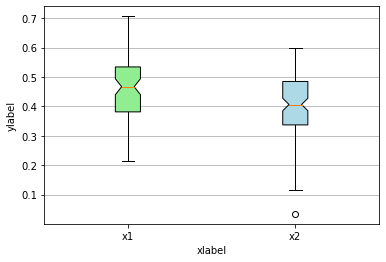

In [44]:
#bplot = result_compare.boxplot(whis=1.5, patch_artist=True) #columns列索引，values所有数值
fig = plt.subplot(1,1,1)
bplot = fig.boxplot(result_compare_lst,
                notch=True,
                vert=True, 
                patch_artist=True)
#颜色填充
colors = ['lightgreen', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


fig.yaxis.grid(True) #在y轴上添加网格线
fig.set_xticks([y+1 for y in range(len(result_compare_lst))] ) 
fig.set_xlabel('xlabel') #设置x轴名称
fig.set_ylabel('ylabel') #设置y轴名称


# 加刻度名称
plt.setp(fig, xticks=[1,2],
         xticklabels=['x1', 'x2'])
# 我们的刻度数是哪些，以及我们想要它添加的刻度标签是什么。
        
plt.show()